# Explorative data analysis of cleaned data frame

This notebook is meant for EDA of the dataframe we ended up with after cleaning the data from irrelevant attributes, missing values, duplicates and outliers

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('..\Yelp Dataset\merged_data.csv')
df.head()

,review_id,user_id,business_id,review_stars,review_date,user_review_count,user_average_stars,city,state,restaurant_stars,restaurant_review_count,category
0,vkVSCC7xljjrAI4UGfnKEQ,bv2nCi5Qv5vroFiqKGopiw,AEx2SYEUJmTxVVB18LlCwA,5,2016-05-28,6,4.67,Montréal,QC,4.0,84,Diners
1,vm1b1keOzwHjtGZEPPuYXA,xYciRtVZ1PW4IxSX4oJ1aw,AEx2SYEUJmTxVVB18LlCwA,5,2016-02-22,177,3.41,Montréal,QC,4.0,84,Diners
2,jUzausdZ_ujqe_n8BlBj-g,DVOOF0Z627DyrZ4XKQbTgA,AEx2SYEUJmTxVVB18LlCwA,5,2017-08-08,40,3.98,Montréal,QC,4.0,84,Diners
3,SXwA9KZ-Nc_hMARk_3cJ7g,5Ymfsf9fAYz-Ds_p0xawVQ,AEx2SYEUJmTxVVB18LlCwA,5,2013-03-29,79,4.52,Montréal,QC,4.0,84,Diners
4,oCRDwF3tszAkeszSfxwthg,5JoKz3mU42Cp906KRXDwJw,AEx2SYEUJmTxVVB18LlCwA,4,2009-01-17,3,4.00,Montréal,QC,4.0,84,Diners


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2144848 entries, 0 to 2144847
Data columns (total 12 columns):
review_id                  object
user_id                    object
business_id                object
review_stars               int64
review_date                object
user_review_count          int64
user_average_stars         float64
city                       object
state                      object
restaurant_stars           float64
restaurant_review_count    int64
category                   object
dtypes: float64(2), int64(3), object(7)
memory usage: 196.4+ MB


In [4]:
# Setting float format options to show floats with three desimals
pd.set_option('display.float_format', lambda x: '%.3f' % x)

df.describe(include='all')

,review_id,user_id,business_id,review_stars,review_date,user_review_count,user_average_stars,city,state,restaurant_stars,restaurant_review_count,category
count,2144848,2144848,2144848,2144848.000,2144848,2144848.000,2144848.000,2144848,2144848,2144848.000,2144848.000,2144848
unique,2144848,714590,38454,nan,4465,nan,nan,691,37,nan,nan,39
top,_xp-m-X4rWscHXinawIjEg,CxDOIDnH8gp9KXzpBHJYXw,4JNXUYY8wbaaDmk3BPzlWw,nan,2017-08-13,nan,nan,Las Vegas,NV,nan,nan,Mexican
freq,1,1560,7362,nan,1963,nan,nan,600151,683342,nan,nan,159527
mean,NaN,NaN,NaN,3.689,NaN,118.490,3.720,NaN,NaN,3.693,419.864,NaN
std,NaN,NaN,NaN,1.364,NaN,324.025,0.730,NaN,NaN,0.606,823.857,NaN
min,NaN,NaN,NaN,1.000,NaN,0.000,1.000,NaN,NaN,1.000,3.000,NaN
25%,NaN,NaN,NaN,3.000,NaN,9.000,3.400,NaN,NaN,3.500,64.000,NaN
50%,NaN,NaN,NaN,4.000,NaN,27.000,3.790,NaN,NaN,4.000,174.000,NaN
75%,NaN,NaN,NaN,5.000,NaN,100.000,4.140,NaN,NaN,4.000,420.000,NaN


We want to only include states with over 1000 reviews and that are located in US or Canada. Therefore we subset only those states.

In [5]:
# Value counts into dataframe
state_values = pd.DataFrame(df.state.value_counts())

# Filtering states with over 1000 reviews
state_values = state_values[state_values['state'] > 1000]

# Dropping BW (Germany) and EDH (Edinburgh)
state_values.drop(['BW', 'EDH'], inplace=True)

# Getting indexes
state_idx = state_values.index

# Filtering df with state_idx
df = df[df['state'].isin(state_idx)]
print(df.state.value_counts())
df.shape

NV    683342
AZ    637758
ON    309475
NC    130851
OH    110417
PA    103828
QC     73682
WI     47477
IL     15642
SC      4666
Name: state, dtype: int64


(2117138, 12)

In [8]:
# Setting up seaborn for plotting
sns.set(palette="deep", font_scale=1.1)

### Categorical variables

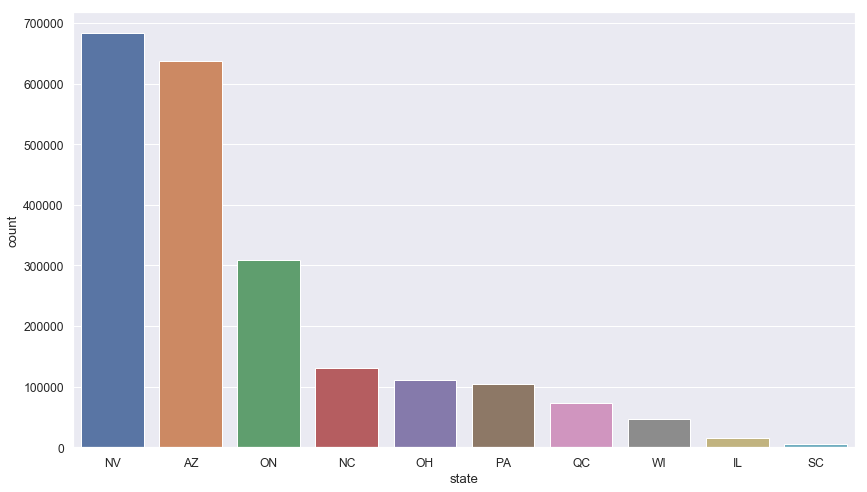

In [13]:
# Reviews in each state
plt.figure(figsize=(14,8))
chart = sns.countplot(data=df, x='state', order = df['state'].value_counts().index)
chart = chart.set_xticklabels(labels=df['state'].value_counts().index)

In [14]:
# Reviews in each city
df.city.value_counts()

Las Vegas                    600151
Phoenix                      237624
Toronto                      197568
Scottsdale                   113132
Charlotte                     99204
Pittsburgh                    79727
Henderson                     64159
Tempe                         60535
Montréal                      60143
Mesa                          49144
Chandler                      47056
Cleveland                     40038
Madison                       37461
Gilbert                       35423
Glendale                      32675
Mississauga                   23198
Markham                       20379
Peoria                        15508
North Las Vegas               13202
Surprise                      11338
Richmond Hill                 10903
Champaign                     10557
Goodyear                       9178
Scarborough                    9017
North York                     8724
Avondale                       7279
Vaughan                        6810
Lakewood                    

Mexican                   158711
American (New)            149824
American (Traditional)    146329
Breakfast & Brunch        128955
Pizza                     123101
Italian                   116552
Sandwiches                106318
Chinese                    99420
Burgers                    88497
Japanese                   79364
Sushi Bars                 76583
Seafood                    69694
Steakhouses                66638
Fast Food                  56071
Thai                       52881
Asian Fusion               50404
Salad                      43991
Barbeque                   43802
Vietnamese                 42706
Cafes                      36687
Mediterranean              36420
Indian                     31656
French                     29688
Diners                     27968
Korean                     26012
Vegetarian                 25804
Desserts                   24560
Chicken Wings              23812
Greek                      20609
Bakeries                   19308
Canadian (

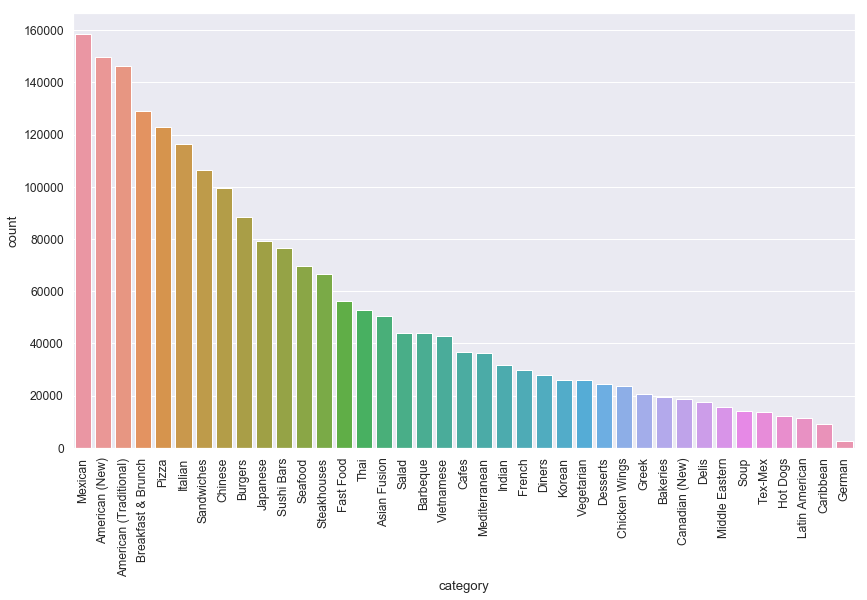

In [15]:
# Review counts of different cuisiness

plt.figure(figsize=(14,8))
chart = sns.countplot(data=df, x='category', order = df['category'].value_counts().index)
chart.set_xticklabels(labels=df['category'].value_counts().index, rotation=90)

df.category.value_counts()

In [25]:
df.shape

(2117138, 12)

In [26]:
df.to_csv('..\Yelp Dataset\clean.csv')